# Finding the best spot to open a gym
**in Treviso province, Italy**

by Filippo Michielon

## 1. Introduction

A friend has graduated some years ago to become a personal trainer. He has then worked in a couple gyms and aquired some experience in the field. While working in gyms, many customers showed interest in his particular way of training and asked for private lessons.

Giving private lessons in someone else's gym has been difficults, since he always have to pay attention to other customers, he has no room for his own lessons and he basically has give lessons for free because he's paid by the boss and can not gain money autonomously in that gym.

So, he decided he wants to try and open his own personal gym, where he can teach with his appreciated method and have his personal space to plan and organize lessons, both private and public.

We live in Treviso area, a city in northeast Italy, close to Venice. Here in Italy, people are used to move normally within their province. Provinces are an intermediate geographical and administrative layer, between municipalities and regions (regions are more or less the equivalent of States in the US).

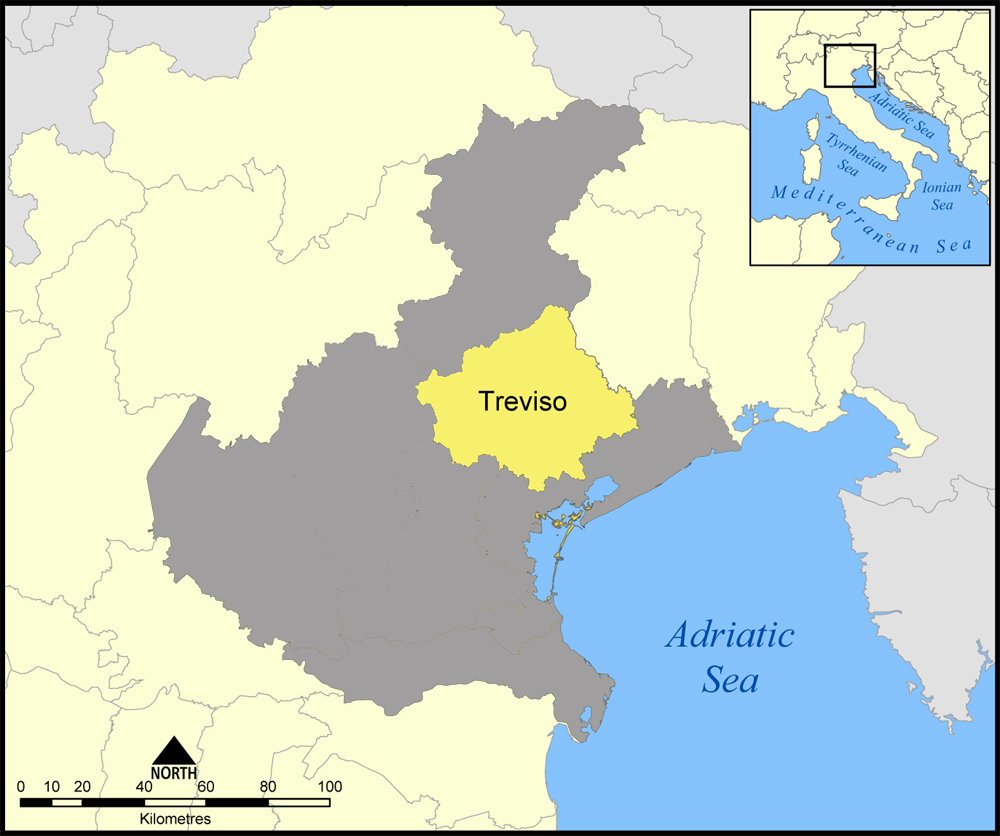
*Location of Treviso province in Veneto region. Source: Wikipedia*

He asked some of his affectionate customers and most of them told him they would have no problem moving within the province to attend his lessons, so he decided he wants to open a new gym in the province.

A thing to consider is that there are tens of gyms distributed in the province, and he wants to create a place which would be enjoyable by people he doesn't know yet, not only his current customers. So he wants to find a couple areas in the province where he would not suffer of heavy competition with other existing gyms. 

We decided to use Foursquare data to search the best areas to open his new gym.

## 2. Data acquisition and cleaning

For this analysis we used three data sources: venues (gyms), population and geographical.

### 2.1 Venues data

To find out the existing gyms in the area, we used Foursquare APIs. I set the locations approximately on the center of the province and the radius to 45km in order to be able to find all province territory gyms and gyms in the area just outside of it.

Foursquare lets us filter by venues category ID, so i didn't need to request all venues data and filter it.

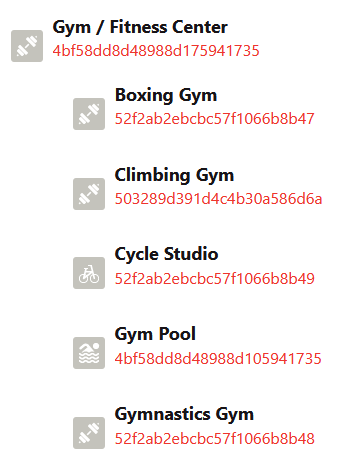
*Categories IDs in Foursquare API documentation*

I just needed to specify the "father" gym category in the request using categoryId. The final request URL had this format:

https://api.foursquare.com/v2/venues/explore?client_id=xxxxxx&client_secret=xxxxxxx&ll=latitude,longitude&v=20180605&radius=45000&limit=100&categoryId=4bf58dd8d48988d175941735

The response correctly contained only gyms and similar venues. I then cleaned the data to transform in into a datafram, easier to work with, and keep names, categories and coordinates of the various venues. Here is what the venues dataframe looked like:

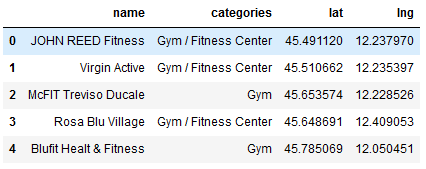

### 2.2 Population data

To better investigate where in the province there are more inhabitants (who could be potential customers) i decided to add to the map we are going to build a choropleth layer with the population of all the municipalities in the province, so i downloaded an Excel worksheet containing data about population in Italian provinces and municipalities, made by [Istat](https://www.istat.it/), the Italian statistics institute.

I read the worksheet using pandas, kept only the columns containing municipality name and population and filtered the dataframe to only show data related to Treviso province, since, we don't need other for now.

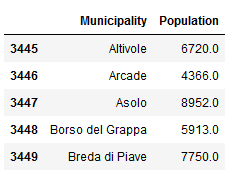

### 2.3 Geographical data

To build the choropleth map i needed geospatial data of the municipalities to draw their boundaries. Folium, the library i used to generate maps, uses geojson format for this purpose, so i downloaded a geojson of treviso municipalities available in (a repository on GitHub by Openpolis)[https://github.com/openpolis/geojson-italy].

Folium intepretes geojson data automatically, it just need to know which keyword to use as primary key to bind the data, in our case it's 'feature.properties.name'.

## 3. Data analysis

I needed mostly to create and visualize maps in order to have an idea of suitable areas to open the gym, so i generated two different layers on the province map.

The first one is showing us the results of retrieving existing gyms data on Foursquare:
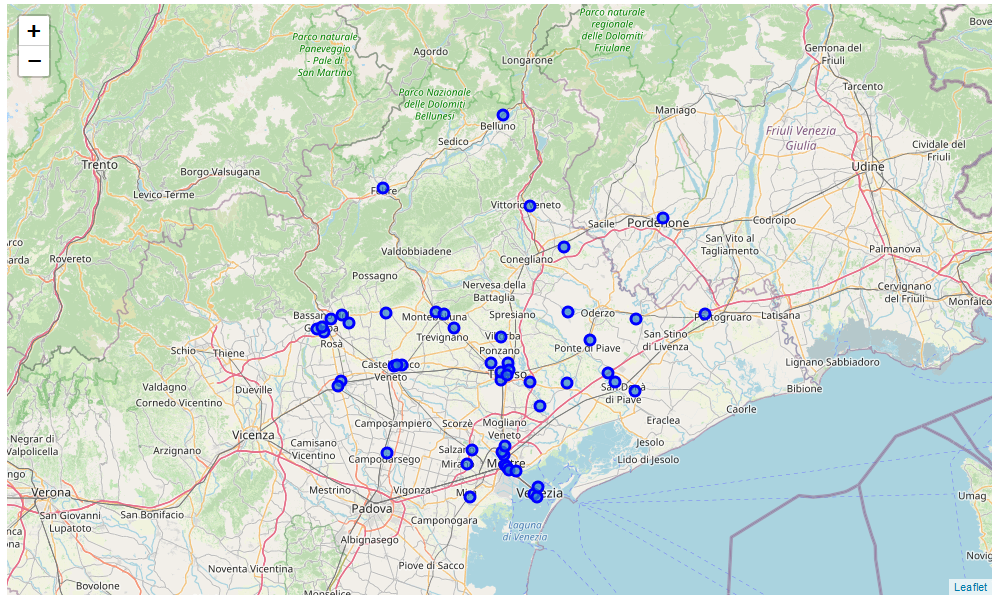

This gives us and idea on how they're distributed in the area, but does not tell us much about how they actually cover province territory.

So i generated a second map, the choropleth map of municipalities, colored according to their population:
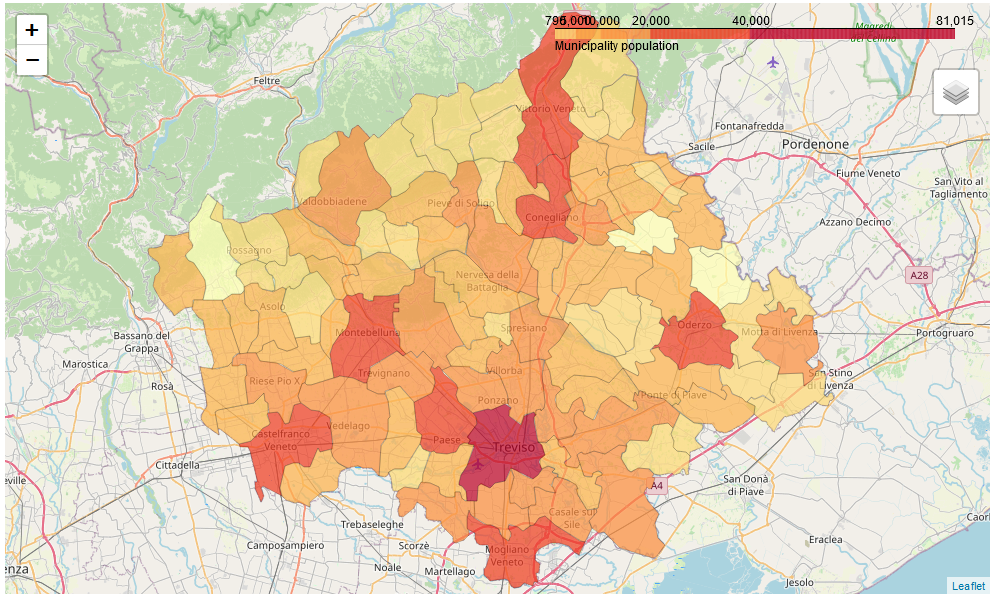

Now that we have these two layers, combining them gives us a nie overview on how gyms are distributed in the province, compared to the population, so this is the third map:
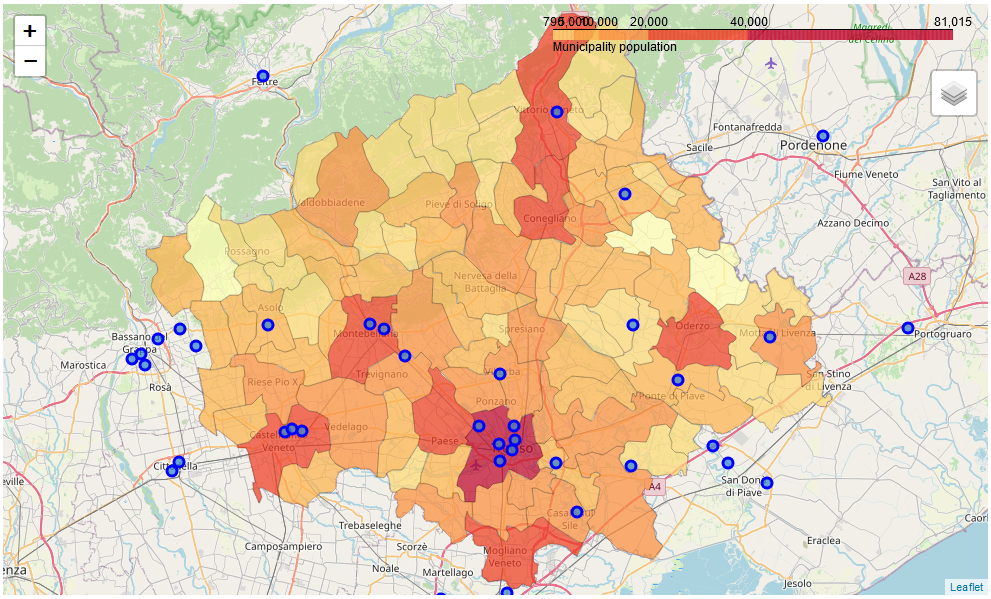

## 4. Results

Analyzing the data shown above, we identified two areas where it should be a good investment to open a new gym:
- the first area is  Valdobbiadene area, which is a pretty large area with many municipalities and no gyms open at the moment,
- the second one is in the southern part of Conegliano municipality, which is a pretty large and important municipality, in a strategic position and has no close gyms right now.

So i created a new map, superimposing on the previous one the two ideas we had analyzing data:
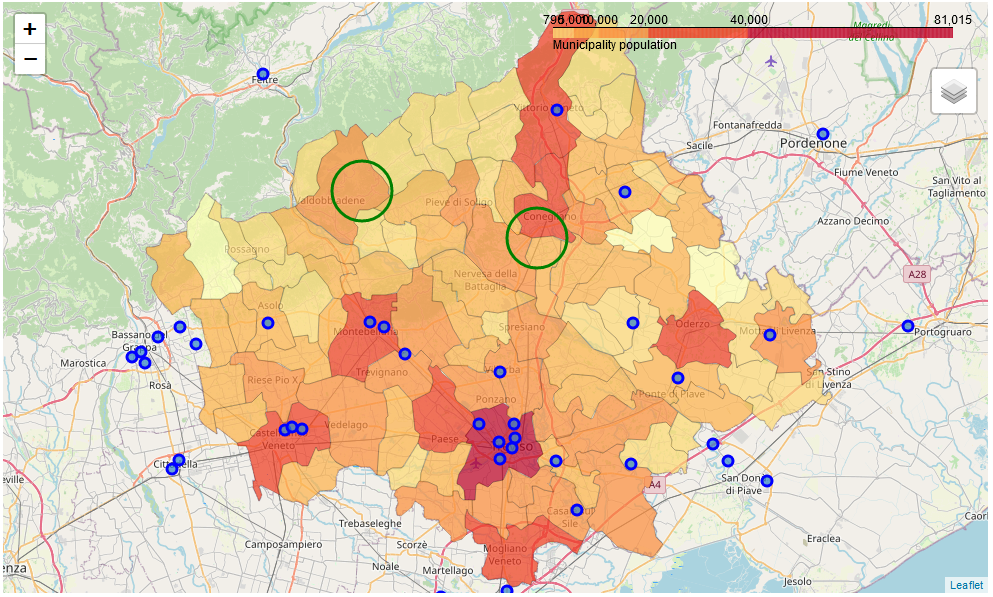

## Conclusion

This has been my data project regarding the area where i live, the business problem was to find potential good areas for a new gym opening and i used data to try and help answering this problem without having to manually check competitors all around the territory.